In [40]:
import os
from os import walk

import pandas as pd
import numpy as np
import sys
import re

import matplotlib.pyplot as plt
from matplotlib.pyplot import *

import numpy as np
import seaborn as sns

from collections import Counter

%matplotlib inline

pd.set_option('display.max_rows', 9000)
pd.set_option('display.max_columns', 1500)
pd.set_option('max_colwidth', 400)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))


#Set seaborn color palette:
my_pal = {'Kourami' : sns.color_palette("tab10")[0], 'HLA*LA' : sns.color_palette("tab10")[1], 'Optitype' : sns.color_palette("tab10")[2], 'HISAT-genotype' : sns.color_palette("tab10")[3], 'STC-Seq' : sns.color_palette("tab10")[4], 'Full Dataset' : sns.color_palette("tab10")[5]} 

In [41]:
main_folder_path = 'C:\\Users\\nikol\\OneDrive\\DTU\\11_semester\\'

In [42]:
# #Choose between 221 samples above 100X or the 14 samples above 200X
# high_coverage = True
high_coverage = False

high_coverage_id_list = ['HG00731', 'HG00732', 'HG01756', 'HG01757', 'HG01872', 'HG01873', 'HG01886', 'HG01953', 'HG01968','HG02014', 'HG02057', 'NA18912', 'NA19648', 'NA20313']

In [43]:
resolution_list = ["one_field", "two_field", "p_group", "e_group"]

coverage_list = [100, 75, 50, 20, 10, 5, 2, 1]

In [44]:
#Overall result dataframe:

downsample_res_dict_of_dfs = dict()


for coverage in coverage_list: 
    downsample_res_dict_of_dfs[coverage] = dict()
    
    for resolution in resolution_list:
        downsample_res_dict_of_dfs[coverage][resolution] = dict()
        
        #Read result dataframes
        result_df = pd.read_pickle(main_folder_path + "result_dataframes\\" + resolution + "_results_df_" + str(coverage) + "X.pkl")
        errors_metadata_hla_I_df = pd.read_pickle(main_folder_path + "result_dataframes\\" + resolution + "_errors_metadata_hla_I_df_" + str(coverage) + "X.pkl")
        errors_metadata_hla_II_df = pd.read_pickle(main_folder_path + "result_dataframes\\" + resolution + "_errors_metadata_hla_II_df_" + str(coverage) + "X.pkl")

        #Rename columns:
        result_df.rename(columns = {'HLA-LA':'HLA*LA', 'Hisatgenotype':'HISAT-genotype', 'STC-seq': 'STC-Seq'}, inplace=True)
        errors_metadata_hla_I_df.rename(columns = {'HLA-LA':'HLA*LA', 'Hisatgenotype':'HISAT-genotype', 'STC-seq': 'STC-Seq'}, inplace=True)
        errors_metadata_hla_II_df.rename(columns = {'HLA-LA':'HLA*LA', 'Hisatgenotype':'HISAT-genotype', 'STC-seq': 'STC-Seq'}, inplace=True)


        
        #Insert dataframes in dict of dict of dataframes
        downsample_res_dict_of_dfs[coverage][resolution]['result_df'] =  result_df
        downsample_res_dict_of_dfs[coverage][resolution]['errors_metadata_hla_I_df'] = errors_metadata_hla_I_df
        downsample_res_dict_of_dfs[coverage][resolution]['errors_metadata_hla_II_df'] = errors_metadata_hla_II_df

In [58]:
# labels1 = ['Kourami', 'HLA-LA', 'Optitype', 'Hisatgenotype', 'STC-seq', 'ensemble_all', 'ensemble_graph']
# labels2 = ['Kourami', 'HLA-LA', 'Hisatgenotype', 'STC-seq', 'ensemble_graph']

labels1 = ['Kourami', 'HLA*LA', 'Optitype', 'HISAT-genotype', 'STC-Seq']
labels2 = ['Kourami', 'HLA*LA', 'HISAT-genotype', 'STC-Seq']

idx = pd.IndexSlice

def performance_coverage_plot(resolution = 'g_group', allele_index = 'All genes'):
    """
    resolution:    One of four options: ['two_field', 'g_group', 'p_group', 'e_group']
    allele index:  Either specific gene ['A', 'B', 'C', 'DRB1', 'DQB1'] or a group ['HLA-I', 'HLA-II', 'Evaxion', 'Total']
    
    """
    
    accuracy_dict = dict()

    for cov in coverage_list:

        results_df = downsample_res_dict_of_dfs[cov][resolution]['result_df']

        if allele_index in ('HLA-II', 'DRB1', 'DQB1'):
            call_rate = list(results_df.loc[allele_index, idx[labels2, 'call_rate']])

            accuracy_dict[cov] = list(results_df.loc[allele_index, idx[labels2, 'accuracy']])

        else:
            call_rate = list(results_df.loc[allele_index, idx[labels1, 'call_rate']])

            accuracy_dict[cov] = list(results_df.loc[allele_index, idx[labels1, 'accuracy']])

    accuracy_df = pd.DataFrame(accuracy_dict)

    if allele_index in ('HLA-II', 'DRB1', 'DQB1'):
        accuracy_df["labels"] = labels2
    else:
        accuracy_df["labels"] = labels1


    accuracy_df = accuracy_df.set_index("labels", drop=True)
    accuracy_df = accuracy_df.T

    fig, ax = subplots()
    
    accuracy_df.plot(marker='o', figsize = (10,8), color = my_pal, ax=ax)
    
    ax.set_xlabel("Coverage/sequencing depth", size=14)
    ax.set_ylabel("Accuracy (%)", size=14)
    
    ax.set_xticks(coverage_list)
    ax.set_yticks(list(range(0,101,10)))
    
    ax.yaxis.grid()
    
    plt.rcParams.update({'font.size': 14})
    plt.rc('xtick', labelsize=14)
    plt.rc('ytick', labelsize=14)
    
    plt.title('Typing accuracy for gene group: '+allele_index+" in "+"2-field"+" resolution")
    
    legend = ax.legend()
    legend.texts[0].set_text("Kourami")

    
    return fig, ax, accuracy_df
    

(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Typing accuracy for gene group: HLA-I in 2-field resolution'}, xlabel='Coverage/sequencing depth', ylabel='Accuracy (%)'>,
 labels  Kourami  HLA*LA  Optitype  HISAT-genotype  STC-Seq
 100       87.61   96.16     98.12           88.55    43.26
 75        82.03   96.09     97.68           84.86    32.25
 50        65.22   92.03     96.88           76.30    18.99
 20        23.33   72.46     90.87           54.64     3.77
 10         4.59   49.34     78.60           39.30     0.51
 5          0.14   33.41     65.14           30.58     0.00
 2          0.00   24.28     40.80           24.64     0.00
 1          0.00   18.12     25.87           19.06     0.00)

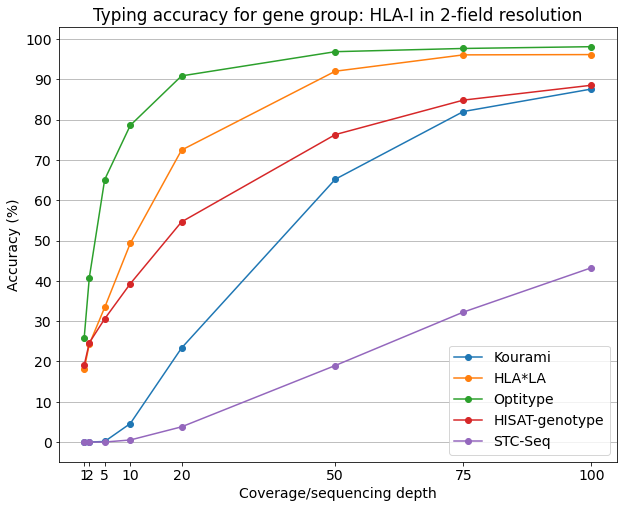

In [59]:
performance_coverage_plot(resolution = 'two_field', allele_index = "HLA-I")

(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Typing accuracy for gene group: HLA-II in 2-field resolution'}, xlabel='Coverage/depth', ylabel='Accuracy (%)'>,
 labels  Kourami  HLA*LA  HISAT-genotype  STC-Seq
 100       81.85   94.57           89.13    49.02
 75        77.17   92.93           85.76    41.85
 50        69.46   89.89           80.43    30.22
 20        42.72   83.26           69.67     6.96
 10        17.03   72.05           57.21     1.31
 5          4.35   56.96           44.57     0.00
 2          0.43   37.83           32.28     0.00
 1          0.00   27.28           24.78     0.00)

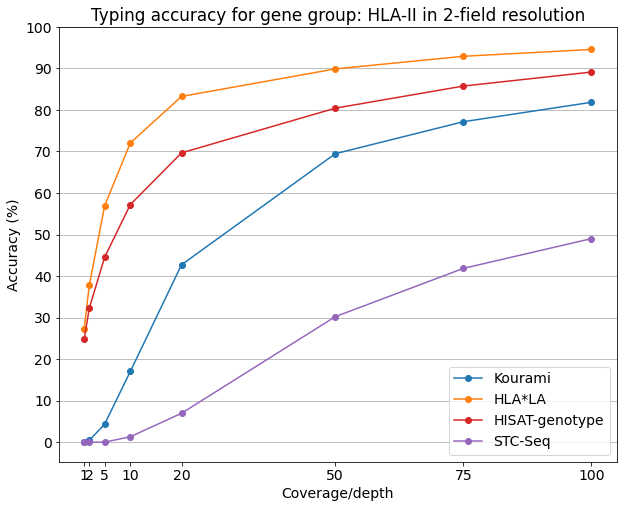

In [50]:
performance_coverage_plot(resolution = 'two_field', allele_index = "HLA-II")


# Time and memory use

In [60]:
#Load mean time and memory use for each tool for each coverage

#Load performance files:
memory_use_gb_dict = dict()
cpu_time_min_dict = dict()
wall_time_min_dict = dict()


for cov in coverage_list:
    
    memory_use_gb_dict[cov] = dict()
    cpu_time_min_dict[cov] = dict()
    wall_time_min_dict[cov] = dict()

    for tool in ['kourami', 'hla-la', 'optitype', 'hisatgenotype', 'stc-seq']:
        full_filepath =  main_folder_path + "output_" + str(cov) + "X\\1000_genomes_results\\" + tool

        #Make list of results for each tool:
        memory_use_list = list()
        cpu_time_list = list()
        wall_time_list = list()

        #Reset list of filenames for each tool
        tool_files = list()

        for (dirpath, dirnames, filenames) in walk(full_filepath):
            tool_files.extend(filenames)

        for file in tool_files:
            #Only include logfiles
            if file.endswith('.log'):
                with open(full_filepath + '\\' + file, 'r') as infile:
                    for line in infile:
                        #Grab memory use
                        if line.startswith('    resources_used.mem'):
                            line_extract = line.split()[-1][:-2]

                            memory_gb = int(line_extract)/(10**6)

                            memory_use_list.append(memory_gb)

                        #Grab cputime 
                        if line.startswith('    resources_used.cput'):
                            line_extract = line.split()[-1]

                            time_min = (int(line_extract[-8:-6]) * 60) + int(line_extract[-5:-3]) + (int(line_extract[-2:]) / 60)

                            cpu_time_list.append(time_min)

                        #Grab walltime
                        if line.startswith('    resources_used.walltime'):
                            line_extract = line.split()[-1]

                            time_min = (int(line_extract[-8:-6]) * 60) + int(line_extract[-5:-3]) + (int(line_extract[-2:]) / 60)

                            wall_time_list.append(time_min)
                    
#        Add mean or median to each dict:

        memory_use_gb_dict[cov][tool] = np.median(memory_use_list)
        cpu_time_min_dict[cov][tool] = np.median(cpu_time_list)
        wall_time_min_dict[cov][tool] = np.median(wall_time_list)
        
#         memory_use_gb_dict[cov][tool] = np.mean(memory_use_list)
#         cpu_time_min_dict[cov][tool] = np.mean(cpu_time_list)
#         wall_time_min_dict[cov][tool] = np.mean(wall_time_list)

In [64]:
memory_df

,kourami,hla-la,optitype,hisatgenotype,stc-seq
100,1.728292,30.952462,0.787784,8.025960,0.399476
75,2.778216,30.728174,0.358272,8.025578,0.315646
50,3.315606,30.284474,0.215506,8.024136,0.227312
20,4.727642,29.733978,0.162086,4.708438,0.105274
10,3.208416,29.567078,0.083356,2.064556,0.065142
5,1.506028,29.469792,0.068692,1.303912,0.040928
2,1.618962,29.303590,0.071644,1.127876,0.032838
1,1.511420,29.325752,0.143264,0.768878,0.024550


Text(0.5, 1.0, 'The effect of coverage on memory use for HLA typing')

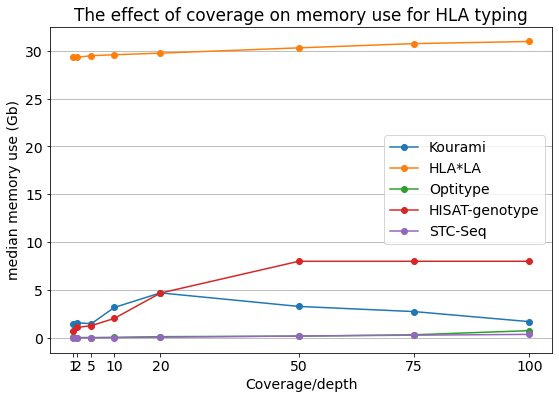

In [67]:
memory_df = pd.DataFrame(memory_use_gb_dict)

memory_df = memory_df.T

memory_df.rename(columns = {'kourami':'Kourami', 'hla-la':'HLA*LA', 'optitype':'Optitype', 'hisatgenotype':'HISAT-genotype', 'stc-seq': 'STC-Seq'}, inplace=True)

fig, ax = subplots()

memory_df.plot(marker='o', figsize = (9,6), ax=ax)

ax.set_xlabel("Coverage/depth")
ax.set_ylabel("median memory use (Gb)")

ax.set_xticks(coverage_list)
# ax.set_yticks(list(range(0,101,10)))

ax.yaxis.grid()

plt.rcParams.update({'font.size': 14})
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

plt.title("The effect of coverage on memory use for HLA typing")

Text(0.5, 1.0, 'The effect of coverage on required CPU time for HLA typing')

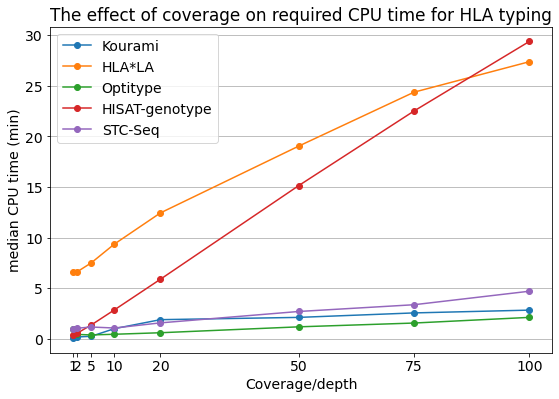

In [68]:
cpu_time_df = pd.DataFrame(cpu_time_min_dict)

cpu_time_df = cpu_time_df.T

cpu_time_df.rename(columns = {'kourami':'Kourami', 'hla-la':'HLA*LA', 'optitype':'Optitype', 'hisatgenotype':'HISAT-genotype', 'stc-seq': 'STC-Seq'}, inplace=True)


fig, ax = subplots()

cpu_time_df.plot(marker='o', figsize = (9,6), ax=ax)

ax.set_xlabel("Coverage/depth")
ax.set_ylabel("median CPU time (min)")

ax.set_xticks(coverage_list)
# ax.set_yticks(list(range(0,101,10)))

ax.yaxis.grid()

plt.rcParams.update({'font.size': 14})
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

plt.title("The effect of coverage on required CPU time for HLA typing")

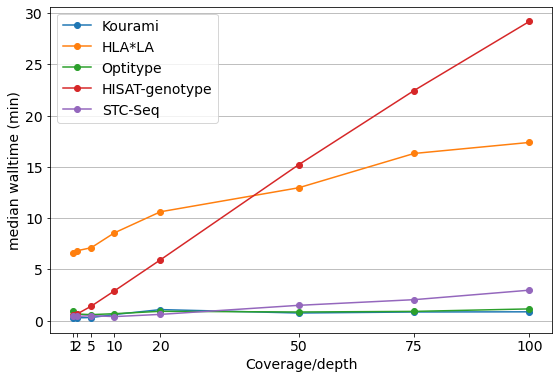

In [69]:
wall_time_df = pd.DataFrame(wall_time_min_dict)

wall_time_df = wall_time_df.T

wall_time_df.rename(columns = {'kourami':'Kourami', 'hla-la':'HLA*LA', 'optitype':'Optitype', 'hisatgenotype':'HISAT-genotype', 'stc-seq': 'STC-Seq'}, inplace=True)

fig, ax = subplots()

wall_time_df.plot(marker='o', figsize = (9,6), ax=ax)

ax.set_xlabel("Coverage/depth")
ax.set_ylabel("median walltime (min)")

ax.set_xticks(coverage_list)
# ax.set_yticks(list(range(0,101,10)))

ax.yaxis.grid()

# With log Y axis:

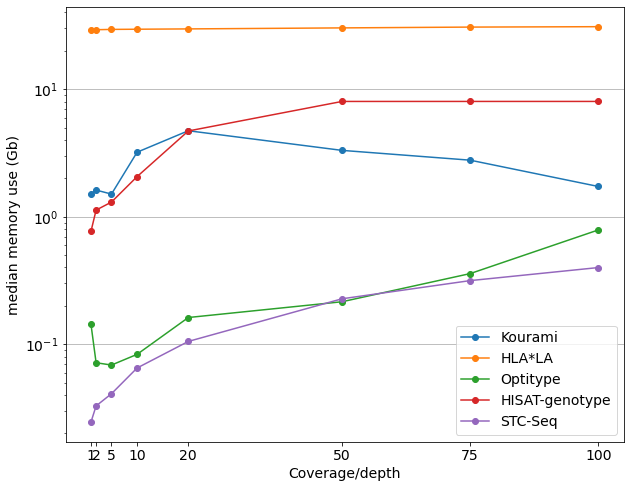

In [70]:
memory_df = pd.DataFrame(memory_use_gb_dict)

memory_df = memory_df.T

memory_df.rename(columns = {'kourami':'Kourami', 'hla-la':'HLA*LA', 'optitype':'Optitype', 'hisatgenotype':'HISAT-genotype', 'stc-seq': 'STC-Seq'}, inplace=True)


fig, ax = subplots()

memory_df.plot(marker='o', figsize = (10,8), ax=ax)

ax.set_xlabel("Coverage/depth")
ax.set_ylabel("median memory use (Gb)")

ax.set_xticks(coverage_list)
# ax.set_yticks(list(range(0,101,10)))
ax.set_yscale('log')
#ax.set_xscale('log')

ax.yaxis.grid()

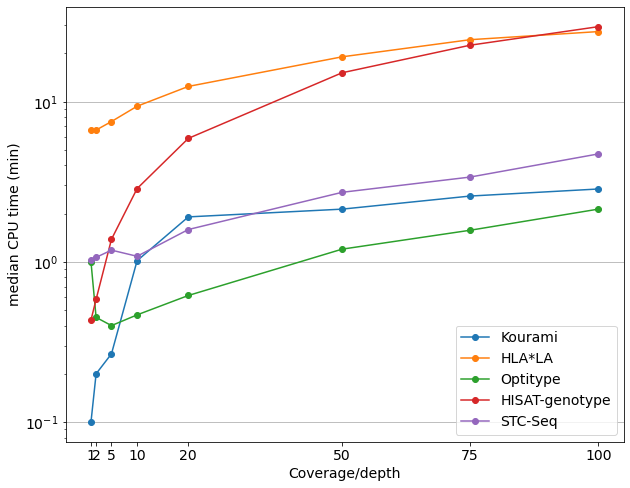

In [71]:
cpu_time_df = pd.DataFrame(cpu_time_min_dict)

cpu_time_df = cpu_time_df.T

cpu_time_df.rename(columns = {'kourami':'Kourami', 'hla-la':'HLA*LA', 'optitype':'Optitype', 'hisatgenotype':'HISAT-genotype', 'stc-seq': 'STC-Seq'}, inplace=True)


fig, ax = subplots()

cpu_time_df.plot(marker='o', figsize = (10,8), ax=ax)

ax.set_xlabel("Coverage/depth")
ax.set_ylabel("median CPU time (min)")

ax.set_xticks(coverage_list)
# ax.set_yticks(list(range(0,101,10)))
ax.set_yscale('log')
#ax.set_xscale('log')

ax.yaxis.grid()

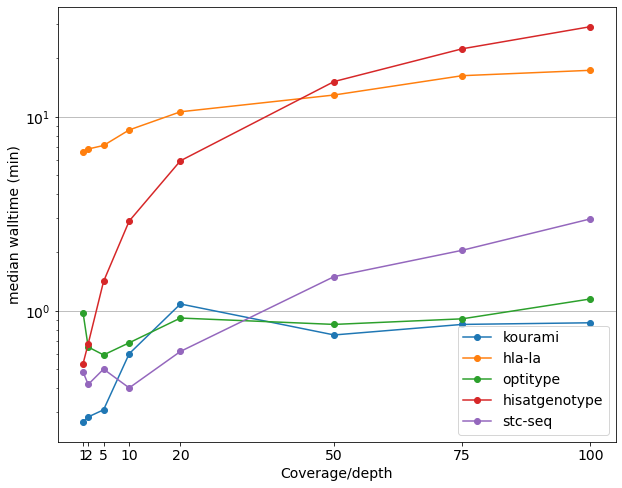

In [57]:
wall_time_df = pd.DataFrame(wall_time_min_dict)

wall_time_df = wall_time_df.T

fig, ax = subplots()

wall_time_df.plot(marker='o', figsize = (10,8), ax=ax)

ax.set_xlabel("Coverage/depth")
ax.set_ylabel("median walltime (min)")


# ax.set_yticks(list(range(0,101,10)))
ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_xticks(coverage_list)

ax.yaxis.grid()